#Multidimensional scaling(MDS)

In [ ]:
import pandas as pd
import io
from google.colab import files
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


In [ ]:
crabs_data = pd.read_csv('crabs.csv') # crabs_data is dataframe
#Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal lobe', 'RW':'Rear Width','CL':'Carapace Midline', 'CW':'Maximum Width','BD':'Body depth'})
#Rename the items from columns species/sex
crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})

In [ ]:
crabs_data.head()

In [ ]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
data_columns = ['Frontal lobe','Rear Width','Carapace Midline','Maximum Width','Body depth']

#Scaling data

In [ ]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [ ]:
crabs_min_max.head()

,species,sex,index,Frontal lobe,Rear Width,Carapace Midline,Maximum Width,Body depth,class,MDS1,MDS2,MDS3
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,0.286376,-0.910743,0.401689
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,0.258700,-0.741283,0.487969
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,0.256046,-0.744355,0.371519
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,0.247372,-0.680542,0.381156
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,0.234927,-0.677904,0.371470


The SMACOF (Scaling by MAjorizing a COmplicated Function) algorithm is a multidimensional scaling algorithm which minimizes an objective function (the stress) using a majorization technique. Stress majorization, also known as the Guttman Transform, guarantees a monotone convergence of stress, and is more powerful than traditional techniques such as gradient descent."


In [ ]:
# n_init is the Number of times the SMACOF algorithm will be run with different initializations
mds = MDS(n_components=2, n_init=15, metric=True)
crabs_mds = mds.fit_transform(crabs_min_max[data_columns])
crabs_min_max[['MDS1','MDS2']] = crabs_mds

print(mds.stress_)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


4.542730295543475


<Axes: xlabel='MDS1', ylabel='MDS2'>

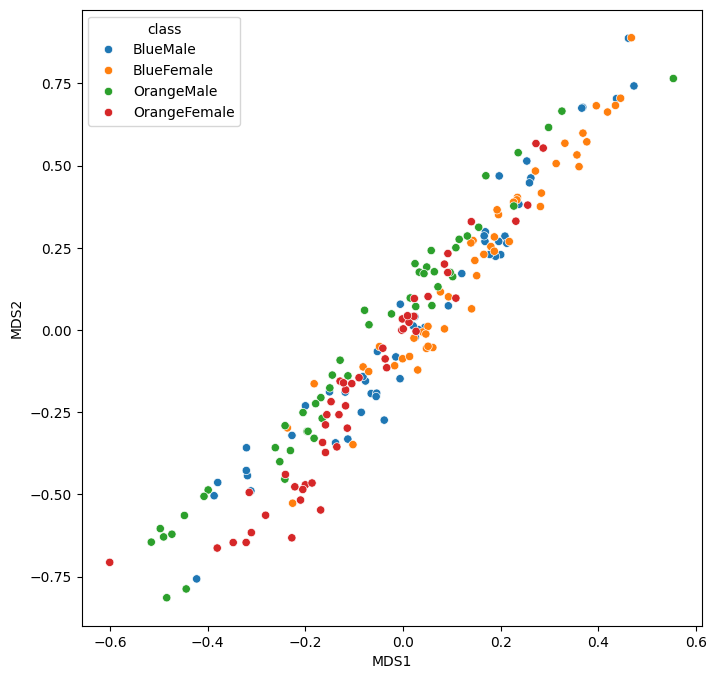

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='MDS1', y='MDS2', hue='class', data=crabs_min_max)

#3D

In [ ]:
mds = MDS(n_components=3, n_init=15, metric=True)
crabs_mds = mds.fit_transform(crabs_min_max[data_columns])
crabs_min_max[['MDS1','MDS2', 'MDS3']] = crabs_mds




/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


2.6477021929543607


2.6477021929543607


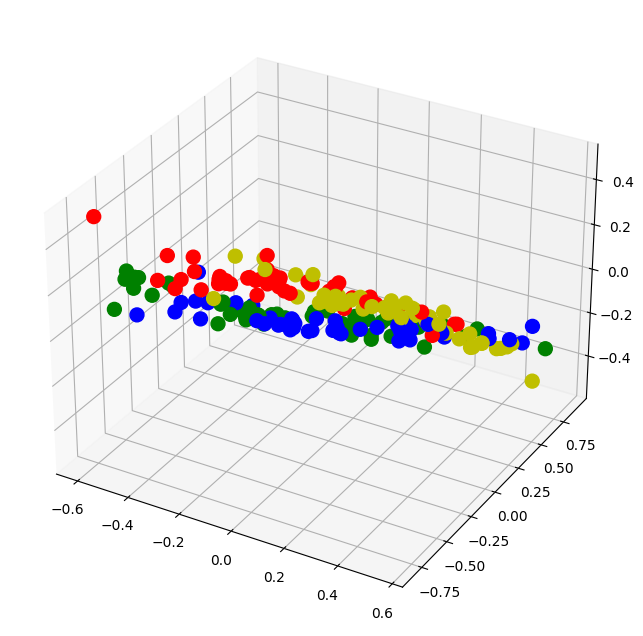

In [ ]:
print(mds.stress_)
colors_crabs = {'BlueFemale':'y', 'BlueMale':'b', 'OrangeFemale':'r', 'OrangeMale':'g'}

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection = '3d')
plt.scatter(crabs_min_max.MDS1, crabs_min_max.MDS2, zs=crabs_min_max.MDS3,depthshade=False,
            c=crabs_min_max['class'].apply(lambda x: colors_crabs[x]),s=100)